<a href="https://colab.research.google.com/github/Rownoak/-Logistic-Regression-and-Linear-Regression-vs-Logistic-Regression/blob/main/Construction%20accident%20pattern%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving PlaywithData (1).xlsx to PlaywithData (1) (1).xlsx
Sheet Names: ['Roofers', 'Concrete Paving', 'Steel', 'Plumbing & Mechanical', 'Electrical', 'Drywall', 'Painting', 'Cabinety', 'Flooring', 'Sheet1']


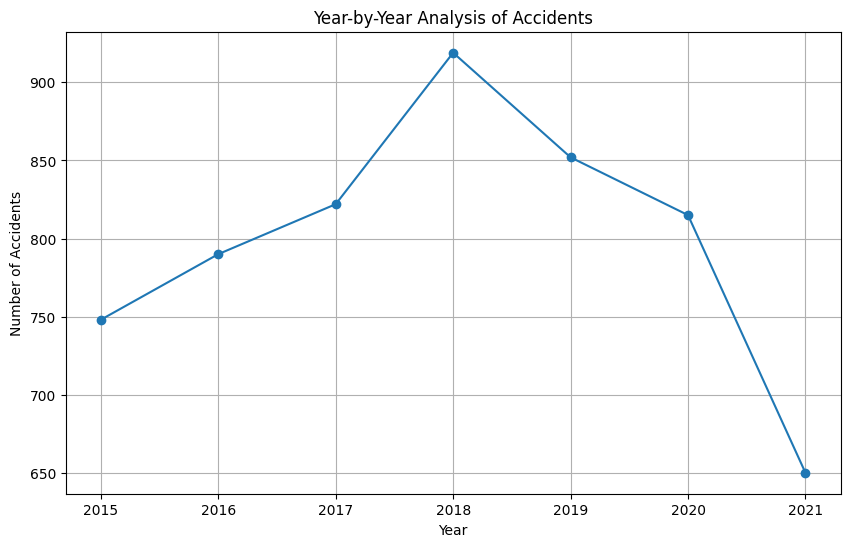

TypeError: sum() got an unexpected keyword argument 'level'

In [4]:
# Install required libraries
!pip install pandas matplotlib seaborn openpyxl

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
file_name = list(uploaded.keys())[0]  # This will use the uploaded file name
df = pd.ExcelFile(file_name)

# Display the sheet names
sheet_names = df.sheet_names
print("Sheet Names:", sheet_names)

# Load all sheets into dataframes
dfs = {sheet_name: df.parse(sheet_name) for sheet_name in sheet_names}

# Define functions for different analyses

# Function for Year-by-Year Analysis
def year_by_year_analysis(dfs):
    yearly_accidents = {}
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns:
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year
            yearly_counts = data['Year'].value_counts().sort_index()
            yearly_accidents[sheet_name] = yearly_counts

    overall_yearly_accidents = pd.DataFrame(yearly_accidents).sum(axis=1)
    overall_yearly_accidents.plot(kind='line', marker='o', figsize=(10, 6), title='Year-by-Year Analysis of Accidents')
    plt.xlabel('Year')
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.show()

# Function for Monthly Trends by State
def monthly_trends_by_state(dfs):
    monthly_state_accidents = {}
    for sheet_name, data in dfs.items():
        if 'Event Month' in data.columns and 'State' in data.columns:
            month_state_counts = data.groupby(['Event Month', 'State']).size().unstack(fill_value=0)
            monthly_state_accidents[sheet_name] = month_state_counts

    combined_monthly_state_accidents = pd.concat(monthly_state_accidents.values(), axis=1).sum(axis=1, level=0)
    combined_monthly_state_accidents.plot(kind='line', figsize=(15, 8), title='Monthly Trends of Accidents by State')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Function for Types of Accidents
def accident_types_analysis(dfs):
    accident_types = pd.Series(dtype=int)
    for sheet_name, data in dfs.items():
        if 'EventTitle' in data.columns:
            accident_types = accident_types.add(data['EventTitle'].value_counts(), fill_value=0)

    accident_types.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 8), color='coral', title='Top 10 Types of Accidents')
    plt.xlabel('Accident Type')
    plt.ylabel('Number of Accidents')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Run the analyses
year_by_year_analysis(dfs)
monthly_trends_by_state(dfs)
accident_types_analysis(dfs)


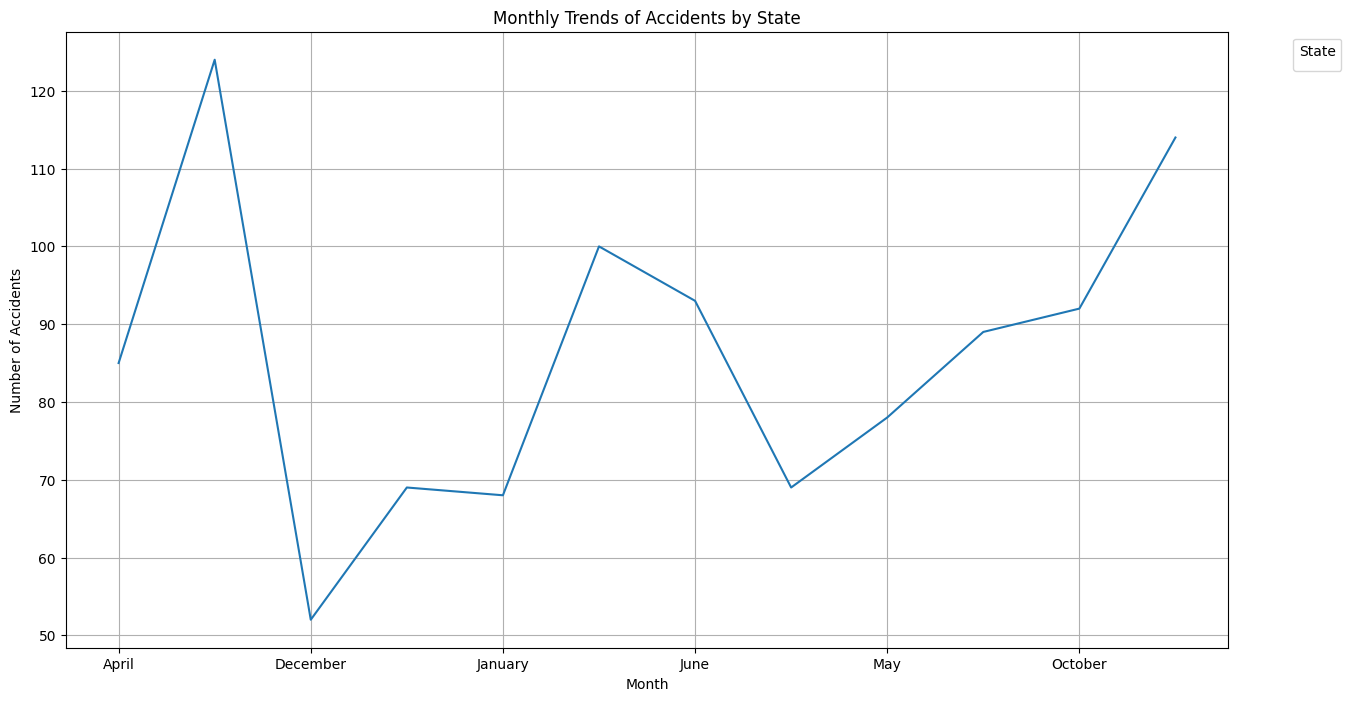

In [5]:
# Function for Monthly Trends by State (Corrected)
def monthly_trends_by_state(dfs):
    monthly_state_accidents = {}
    for sheet_name, data in dfs.items():
        if 'Event Month' in data.columns and 'State' in data.columns:
            month_state_counts = data.groupby(['Event Month', 'State']).size().unstack(fill_value=0)
            monthly_state_accidents[sheet_name] = month_state_counts

    # Combine and visualize
    combined_monthly_state_accidents = pd.concat(monthly_state_accidents.values(), axis=1).sum(axis=1)
    combined_monthly_state_accidents.plot(kind='line', figsize=(15, 8), title='Monthly Trends of Accidents by State')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Re-run the updated analysis
monthly_trends_by_state(dfs)


<ipython-input-6-92a842b1ff94>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_state_counts = data.groupby(['Event Month', 'State']).size().unstack(fill_value=0)


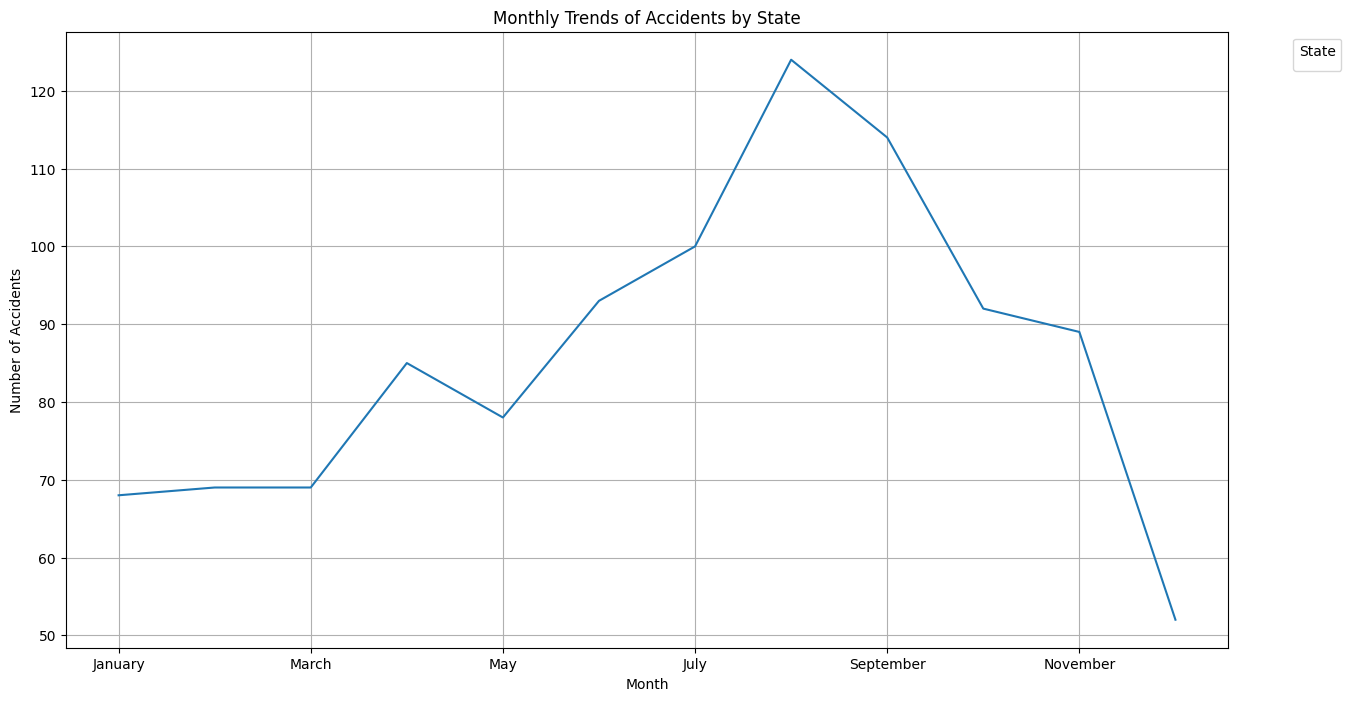

In [6]:
# Function for Monthly Trends by State with Chronological Order of Months
def monthly_trends_by_state(dfs):
    # Define the correct order of months
    month_order = ["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"]

    monthly_state_accidents = {}
    for sheet_name, data in dfs.items():
        if 'Event Month' in data.columns and 'State' in data.columns:
            # Ensure 'Event Month' is categorized and ordered correctly
            data['Event Month'] = pd.Categorical(data['Event Month'], categories=month_order, ordered=True)

            # Group by month and state
            month_state_counts = data.groupby(['Event Month', 'State']).size().unstack(fill_value=0)
            monthly_state_accidents[sheet_name] = month_state_counts

    # Combine and visualize
    combined_monthly_state_accidents = pd.concat(monthly_state_accidents.values(), axis=1).sum(axis=1)
    combined_monthly_state_accidents = combined_monthly_state_accidents.loc[month_order]  # Reorder by months
    combined_monthly_state_accidents.plot(kind='line', figsize=(15, 8), title='Monthly Trends of Accidents by State')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Re-run the analysis
monthly_trends_by_state(dfs)


<ipython-input-16-72fdae41e2b1>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_state_counts = data.groupby(['Event Month', 'State']).size().unstack(fill_value=0)


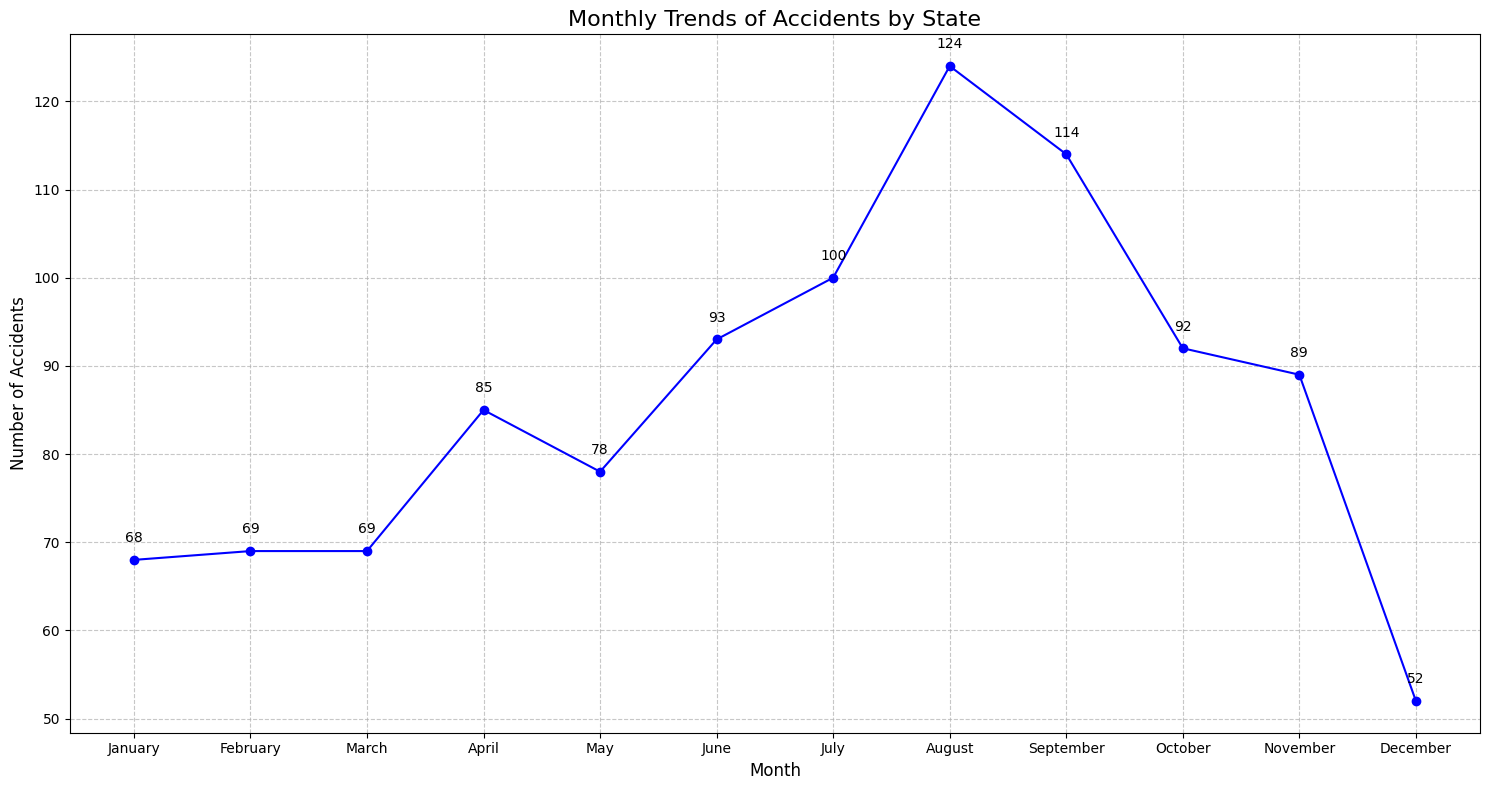

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Function for Monthly Trends by State with Chronological Order of Months and Value Annotations
def monthly_trends_by_state(dfs):
    # Define the correct order of months
    month_order = ["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"]

    monthly_state_accidents = {}
    for sheet_name, data in dfs.items():
        if 'Event Month' in data.columns and 'State' in data.columns:
            # Ensure 'Event Month' is categorized and ordered correctly
            data['Event Month'] = pd.Categorical(data['Event Month'], categories=month_order, ordered=True)

            # Group by month and state
            month_state_counts = data.groupby(['Event Month', 'State']).size().unstack(fill_value=0)
            monthly_state_accidents[sheet_name] = month_state_counts

    # Combine and visualize
    combined_monthly_state_accidents = pd.concat(monthly_state_accidents.values(), axis=1).sum(axis=1)
    combined_monthly_state_accidents = combined_monthly_state_accidents.loc[month_order]  # Reorder by months

    # Plotting with blue color
    plt.figure(figsize=(15, 8))
    plt.plot(
        combined_monthly_state_accidents.index,
        combined_monthly_state_accidents.values,
        marker='o', linestyle='-', color='blue', label='Total Accidents'
    )

    # Add value annotations on each point
    for index, value in enumerate(combined_monthly_state_accidents.values):
        plt.text(index, value + 2, f"{int(value)}", fontsize=10, ha='center', color='black')

    # Add labels and title
    plt.title('Monthly Trends of Accidents by State', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot as JPEG with 300 DPI
    plt.savefig('Monthly_Trends_of_Accidents_by_State.jpeg', format='jpeg', dpi=300)

    # Display the plot
    plt.show()

# Re-run the analysis
monthly_trends_by_state(dfs)


In [17]:
from google.colab import files
files.download('Monthly_Trends_of_Accidents_by_State.jpeg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def faceted_monthly_trends(dfs):
    # Define the correct order of months
    month_order = ["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"]

    # Create an empty dictionary to hold monthly data by year
    monthly_data = pd.DataFrame()

    # Combine data from all sheets into a single DataFrame
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns and 'Event Month' in data.columns:
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year
            data['Event Month'] = pd.Categorical(data['Event Month'], categories=month_order, ordered=True)

            # Append to the monthly_data DataFrame
            monthly_data = pd.concat([monthly_data, data[['Year', 'Event Month']]])

    #


<ipython-input-9-106d779e257b>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = monthly_data.groupby(['Year', 'Event Month']).size().unstack(fill_value=0)


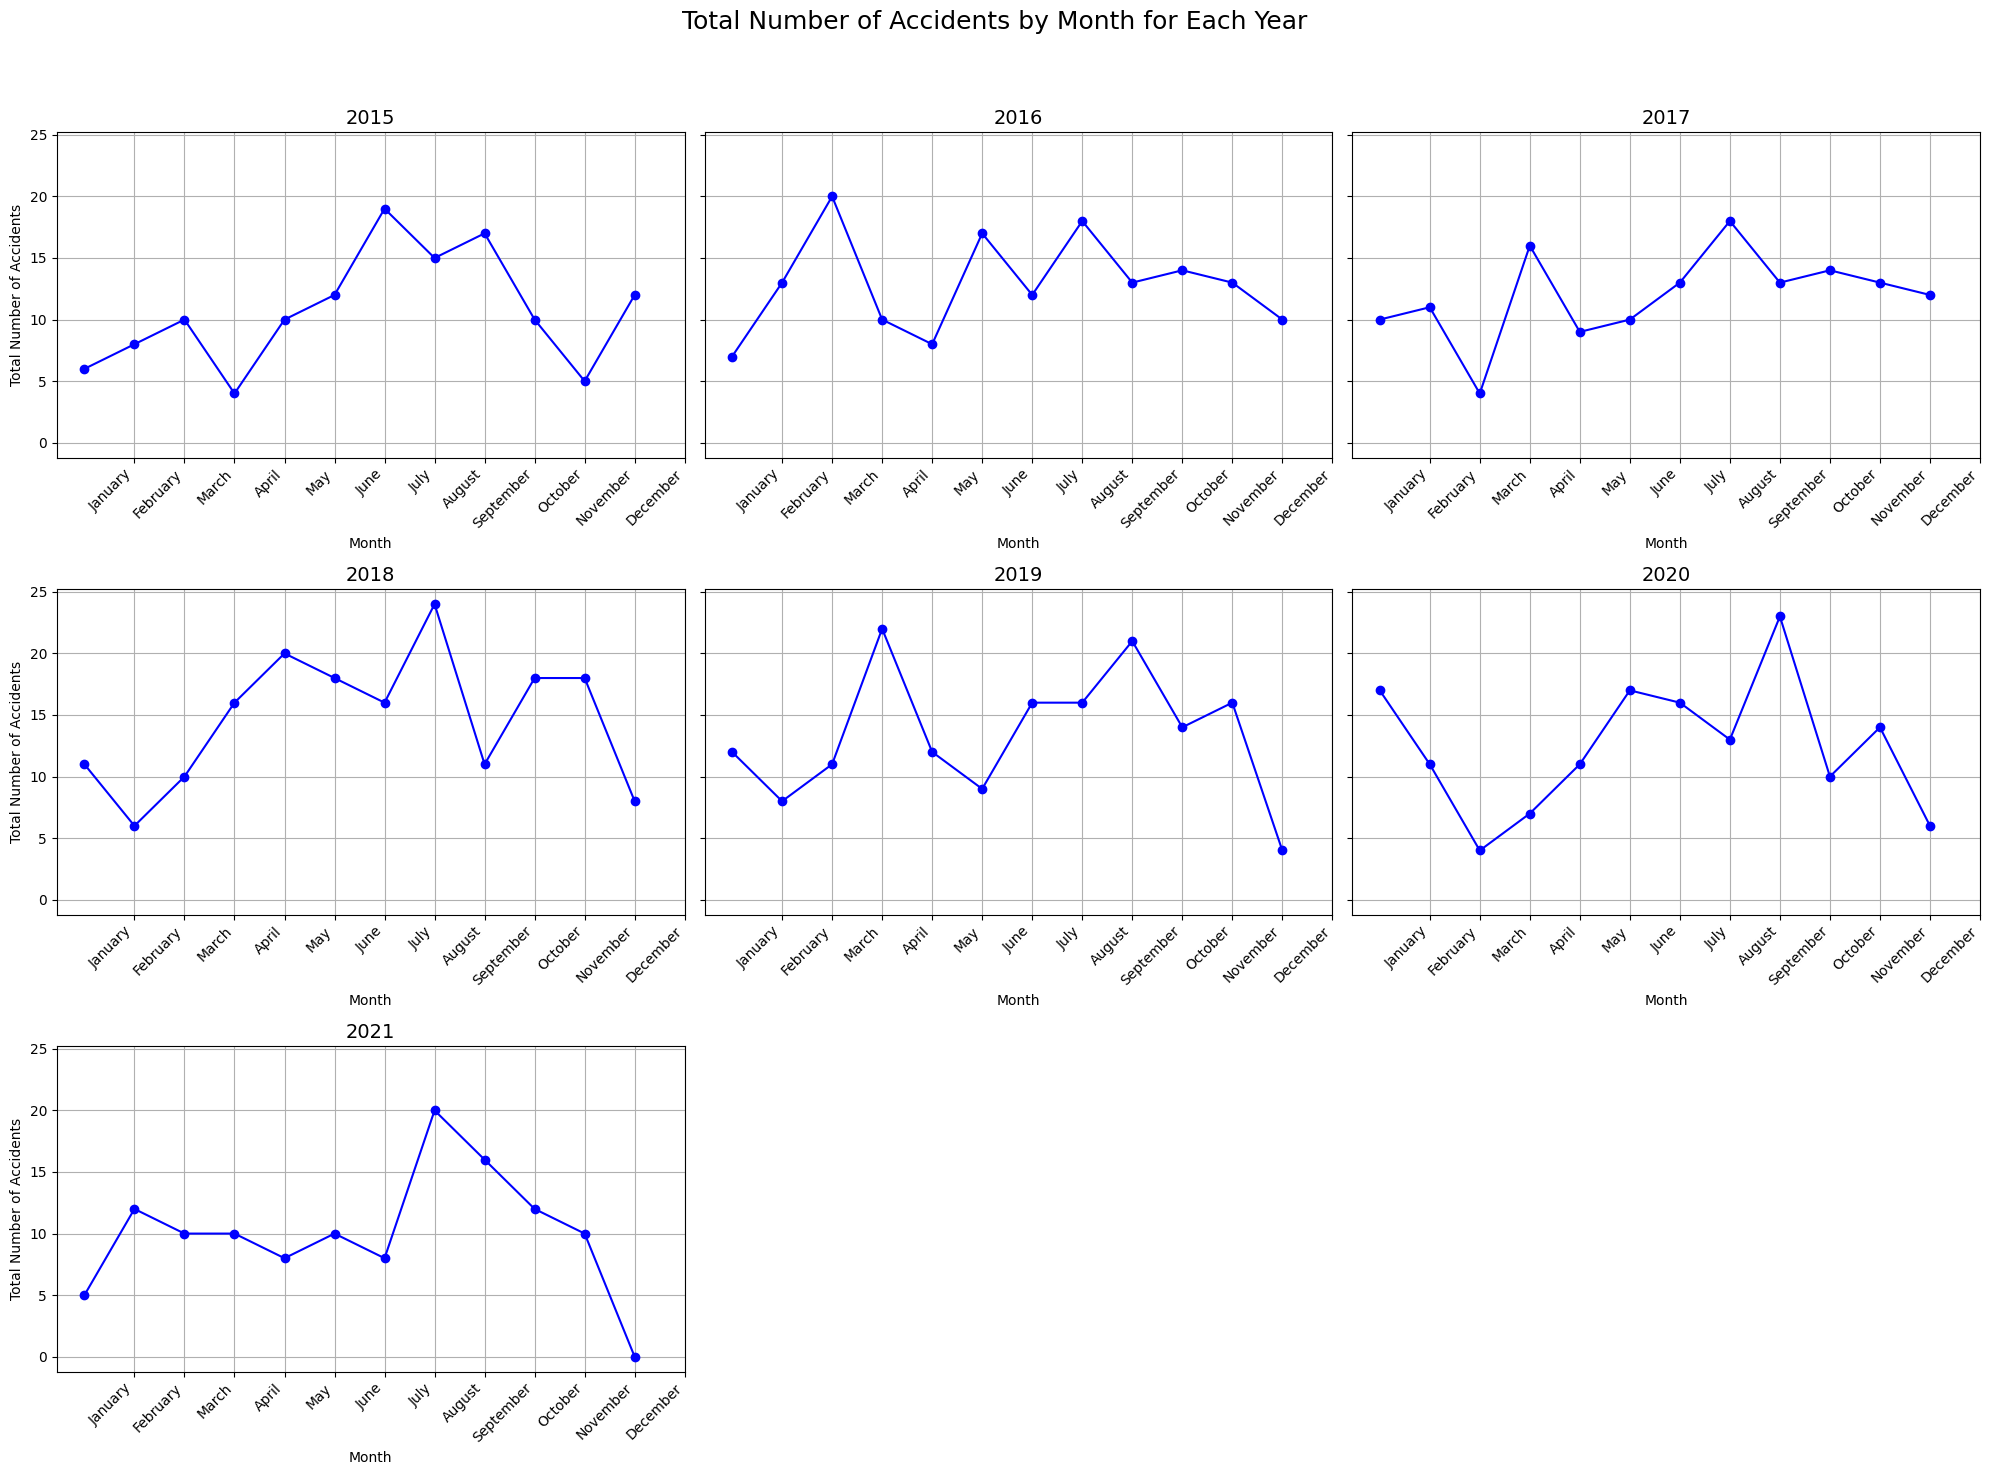

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def faceted_monthly_trends(dfs):
    # Define the correct order of months
    month_order = ["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"]

    # Create an empty DataFrame to hold monthly data by year
    monthly_data = pd.DataFrame()

    # Combine data from all sheets into a single DataFrame
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns and 'Event Month' in data.columns:
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year
            data['Event Month'] = pd.Categorical(data['Event Month'], categories=month_order, ordered=True)

            # Append to the monthly_data DataFrame
            monthly_data = pd.concat([monthly_data, data[['Year', 'Event Month']]])

    # Group by year and month to count accidents
    monthly_counts = monthly_data.groupby(['Year', 'Event Month']).size().unstack(fill_value=0)

    # Create subplots for each year
    years = monthly_counts.index
    num_years = len(years)
    num_cols = 3
    num_rows = (num_years // num_cols) + (num_years % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15), sharey=True)
    fig.suptitle('Total Number of Accidents by Month for Each Year', fontsize=18)

    # Plot each year's data in a separate subplot
    for idx, year in enumerate(years):
        row, col = divmod(idx, num_cols)
        ax = axes[row, col]

        # Plot the monthly trend for the year
        monthly_counts.loc[year].plot(kind='line', marker='o', color='blue', ax=ax)
        ax.set_title(f"{year}", fontsize=14)
        ax.set_xlabel('Month')
        ax.set_ylabel('Total Number of Accidents')
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(month_order, rotation=45, ha='right')
        ax.grid(True)

    # Remove empty subplots
    for idx in range(num_years, num_rows * num_cols):
        fig.delaxes(axes.flatten()[idx])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Run the corrected function
faceted_monthly_trends(dfs)


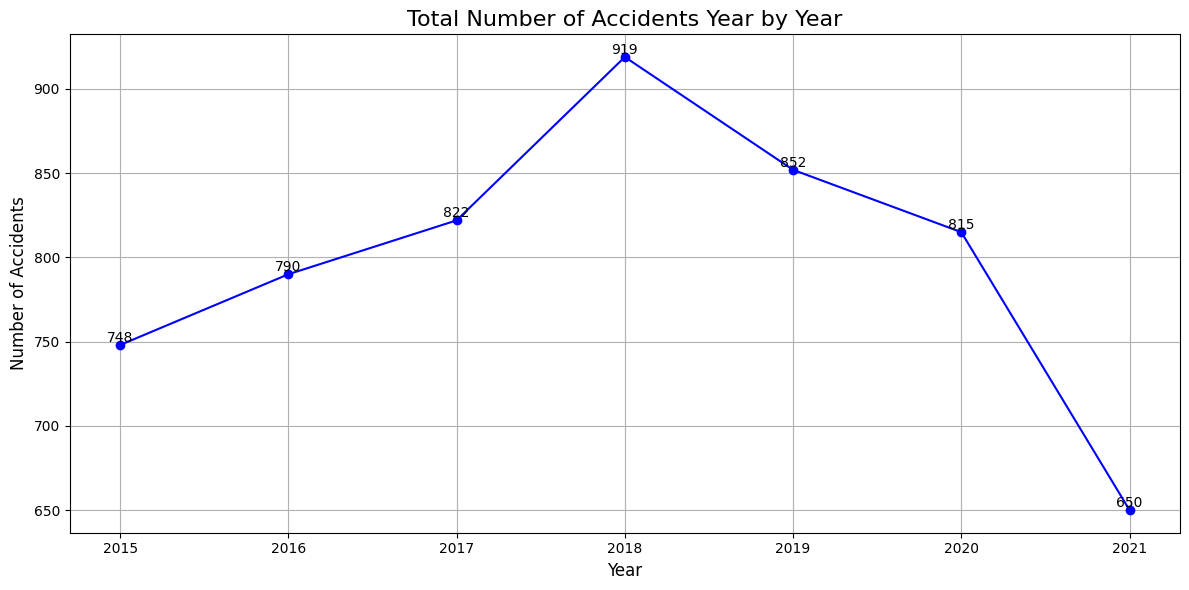

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def year_by_year_trends(dfs):
    # Create an empty DataFrame to hold yearly data
    yearly_data = pd.DataFrame()

    # Combine data from all sheets into a single DataFrame
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns:
            # Convert 'EventDate' to datetime and extract the year
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year

            # Count accidents by year and add to yearly_data DataFrame
            yearly_counts = data['Year'].value_counts().sort_index()
            yearly_data = pd.concat([yearly_data, yearly_counts], axis=1)

    # Sum the total number of accidents for each year
    total_yearly_accidents = yearly_data.sum(axis=1)

    # Plotting the year-by-year accident trends
    plt.figure(figsize=(12, 6))
    plt.plot(total_yearly_accidents.index, total_yearly_accidents.values, marker='o', linestyle='-', color='b')
    plt.title('Total Number of Accidents Year by Year', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.grid(True)

    # Annotate the total number of accidents on the graph
    for year, count in total_yearly_accidents.items():
        plt.text(year, count, f"{int(count)}", fontsize=10, ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Run the function
year_by_year_trends(dfs)


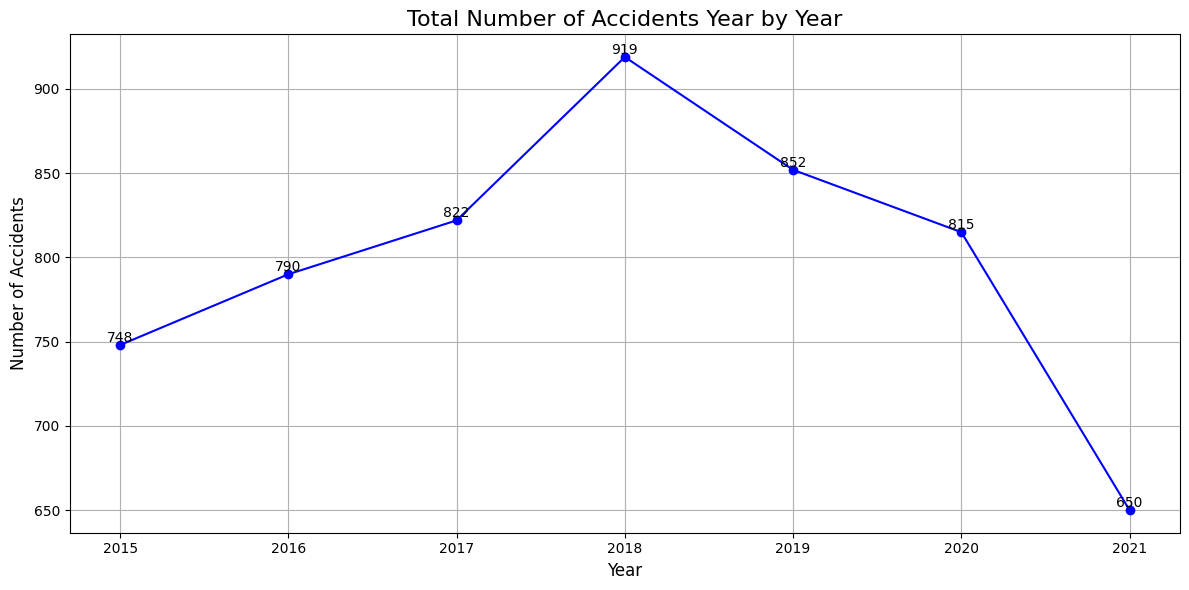

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def year_by_year_trends(dfs):
    # Create an empty DataFrame to hold yearly data
    yearly_data = pd.DataFrame()

    # Combine data from all sheets into a single DataFrame
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns:
            # Convert 'EventDate' to datetime and extract the year
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year

            # Count accidents by year and add to yearly_data DataFrame
            yearly_counts = data['Year'].value_counts().sort_index()
            yearly_data = pd.concat([yearly_data, yearly_counts], axis=1)

    # Sum the total number of accidents for each year
    total_yearly_accidents = yearly_data.sum(axis=1)

    # Plotting the year-by-year accident trends
    plt.figure(figsize=(12, 6))
    plt.plot(total_yearly_accidents.index, total_yearly_accidents.values, marker='o', linestyle='-', color='b')
    plt.title('Total Number of Accidents Year by Year', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.grid(True)

    # Annotate the total number of accidents on the graph
    for year, count in total_yearly_accidents.items():
        plt.text(year, count, f"{int(count)}", fontsize=10, ha='center', va='bottom')

    plt.tight_layout()

    # Save the plot as a JPEG with 300 dpi
    file_name = 'Year_by_Year_Trends.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Run the function
year_by_year_trends(dfs)


<ipython-input-20-91b345d2afa4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = monthly_data.groupby(['Year', 'Event Month']).size().unstack(fill_value=0)


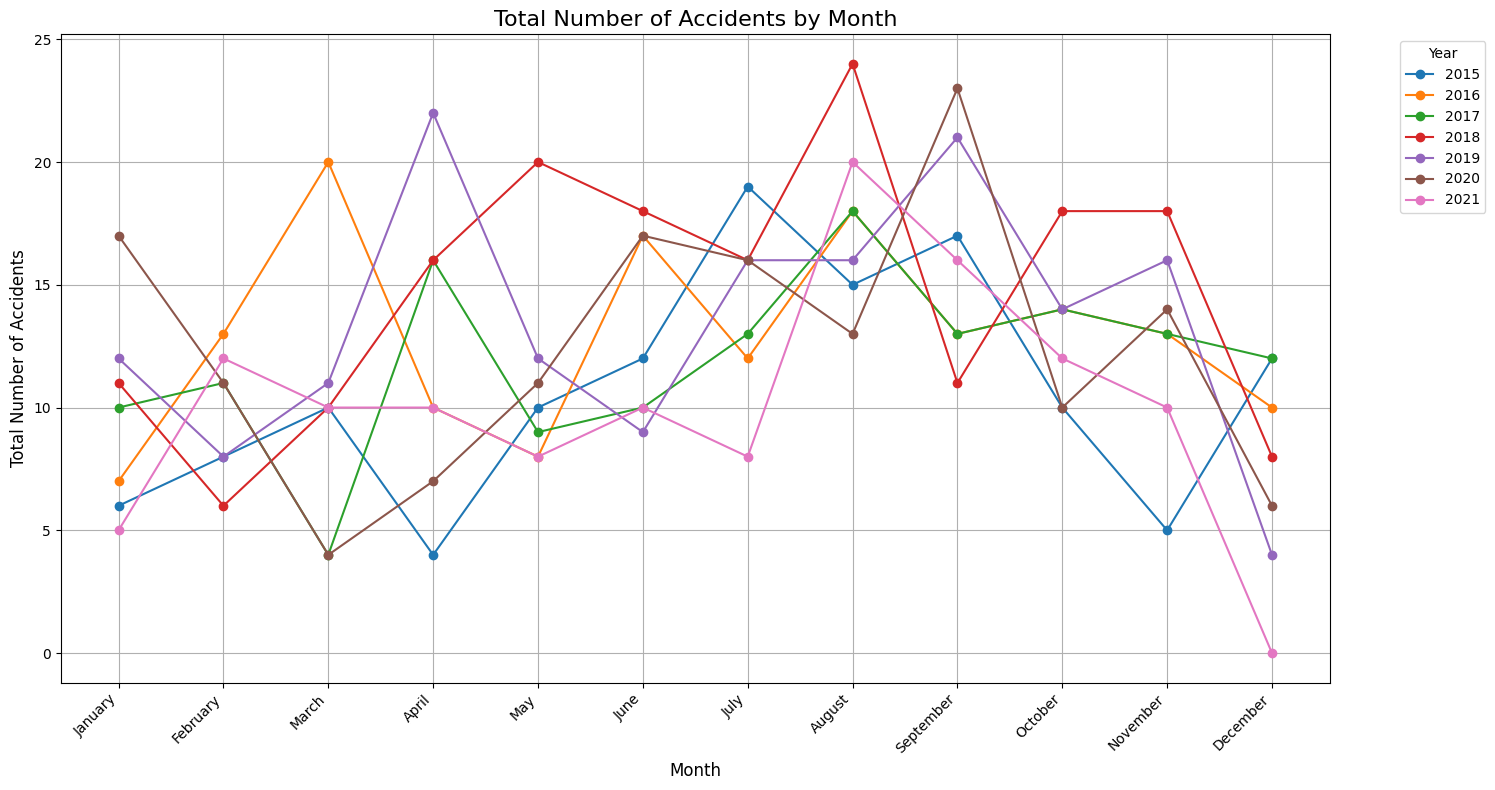

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def combined_monthly_trends(dfs):
    # Define the correct order of months
    month_order = ["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"]

    # Create an empty DataFrame to hold monthly data by year
    monthly_data = pd.DataFrame()

    # Combine data from all sheets into a single DataFrame
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns and 'Event Month' in data.columns:
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year
            data['Event Month'] = pd.Categorical(data['Event Month'], categories=month_order, ordered=True)

            # Append to the monthly_data DataFrame
            monthly_data = pd.concat([monthly_data, data[['Year', 'Event Month']]])

    # Group by year and month to count accidents
    monthly_counts = monthly_data.groupby(['Year', 'Event Month']).size().unstack(fill_value=0)

    # Plotting all years in one image
    plt.figure(figsize=(15, 8))
    for year in monthly_counts.index:
        plt.plot(month_order, monthly_counts.loc[year], marker='o', label=str(year))

    plt.title('Total Number of Accidents by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Number of Accidents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # Save the plot as a JPEG with 300 dpi
    file_name = 'Combined_Monthly_Trends.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Run the modified function
combined_monthly_trends(dfs)


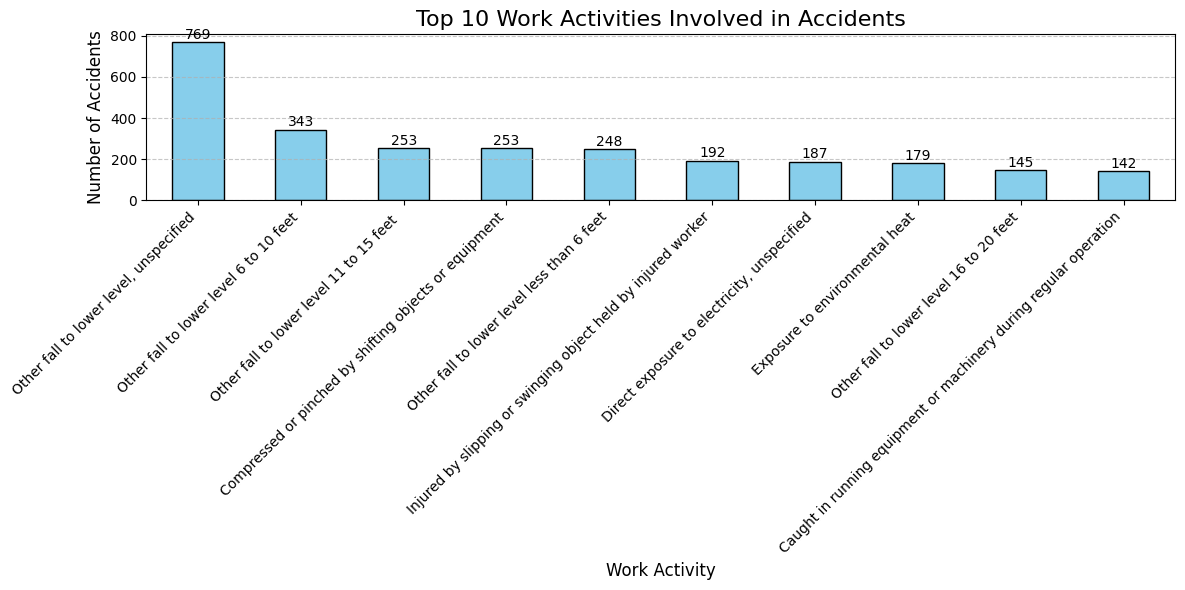

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def top_work_activities(dfs, top_n=10):
    """
    Plot the top work activities involved in accidents and save as JPEG with download option.

    Parameters:
    dfs: Dictionary of dataframes from all sheets
    top_n: Number of top work activities to display (default=10)
    """
    # Create an empty Series to hold work activity counts
    work_activity_counts = pd.Series(dtype=int)

    # Combine data from all sheets and count occurrences of each work activity
    for sheet_name, data in dfs.items():
        if 'EventTitle' in data.columns:
            # Add counts for each work activity
            work_activity_counts = work_activity_counts.add(data['EventTitle'].value_counts(), fill_value=0)

    # Sort the work activities by count in descending order
    top_activities = work_activity_counts.sort_values(ascending=False).head(top_n)

    # Plotting the top work activities
    plt.figure(figsize=(12, 6))
    top_activities.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top {top_n} Work Activities Involved in Accidents', fontsize=16)
    plt.xlabel('Work Activity', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate the number of accidents on the bars
    for index, value in enumerate(top_activities):
        plt.text(index, value + 2, f"{int(value)}", ha='center', va='bottom', fontsize=10)

    # Save the plot as a JPEG with 300 dpi
    file_name = 'Top_Work_Activities_Involved_in_Accidents.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Run the function to display the top work activities
top_work_activities(dfs, top_n=10)


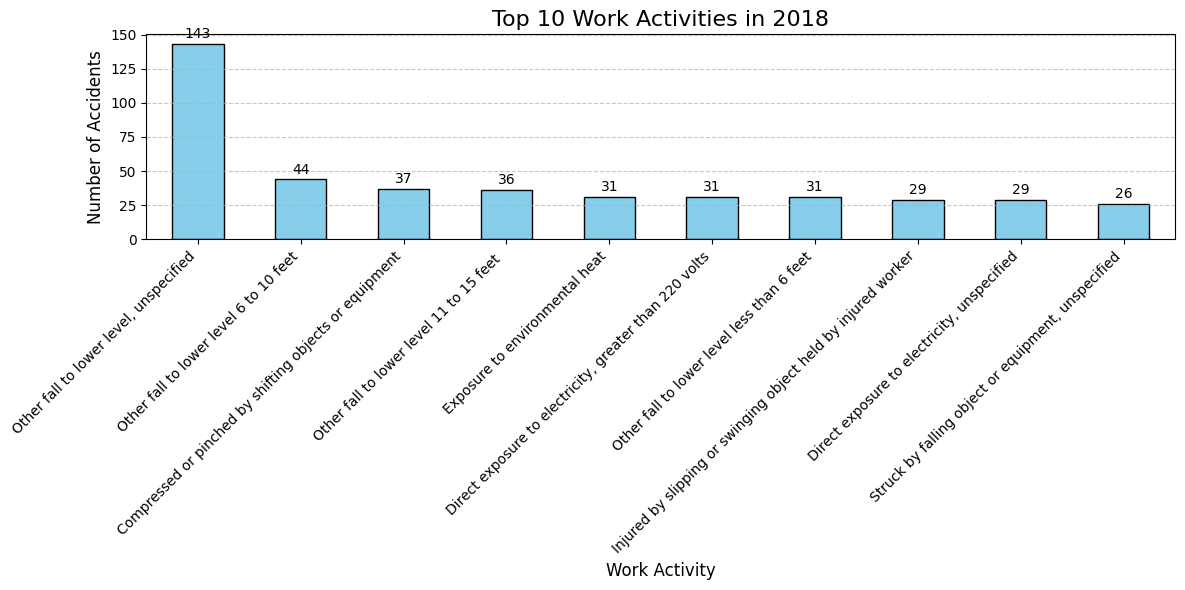

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def top_work_activities_for_year(dfs, year, top_n=10):
    """
    Plot the top work activities involved in accidents for a specific year and save as JPEG with download option.

    Parameters:
    dfs: Dictionary of dataframes from all sheets
    year: The year for which to filter the data
    top_n: Number of top work activities to display (default=10)
    """
    # Create an empty Series to hold work activity counts for the specified year
    work_activity_counts = pd.Series(dtype=int)

    # Combine data from all sheets and count occurrences of each work activity for the specified year
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns and 'EventTitle' in data.columns:
            # Convert 'EventDate' to datetime and extract the year
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year

            # Filter data for the specified year
            year_data = data[data['Year'] == year]

            # Add counts for each work activity in the specified year
            work_activity_counts = work_activity_counts.add(year_data['EventTitle'].value_counts(), fill_value=0)

    # Sort the work activities by count in descending order
    top_activities = work_activity_counts.sort_values(ascending=False).head(top_n)

    # Plotting the top work activities for the specified year
    plt.figure(figsize=(12, 6))
    top_activities.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top {top_n} Work Activities in {year}', fontsize=16)
    plt.xlabel('Work Activity', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate the number of accidents on the bars
    for index, value in enumerate(top_activities):
        plt.text(index, value + 2, f"{int(value)}", ha='center', va='bottom', fontsize=10)

    # Save the plot as a JPEG with 300 dpi
    file_name = f'Top_Work_Activities_in_{year}.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Run the function to display the top work activities for a specific year
top_work_activities_for_year(dfs, year=2018, top_n=10)


<ipython-input-11-b36825b6d1c4>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = monthly_data.groupby(['Year', 'Event Month']).size().reset_index(name='Accidents')


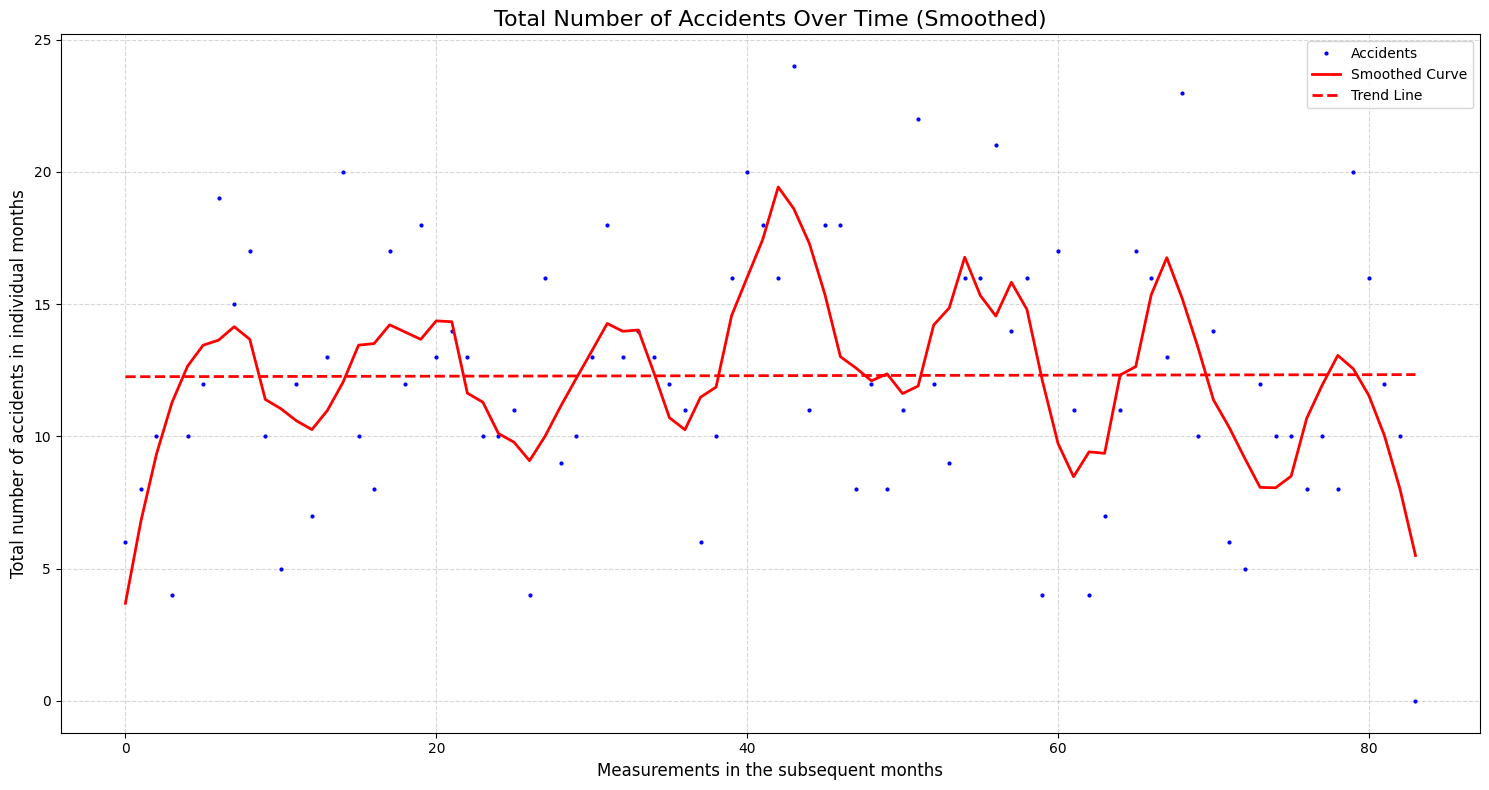

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from scipy import stats

def smooth_monthly_trends_over_time(dfs):
    """
    Plot monthly accident trends over time with a smooth curve and trend line using the provided dataset.
    """
    # Define the correct order of months
    month_order = ["January", "February", "March", "April", "May", "June",
                   "July", "August", "September", "October", "November", "December"]

    # Create an empty DataFrame to hold monthly data by year
    monthly_data = pd.DataFrame()

    # Combine data from all sheets into a single DataFrame
    for sheet_name, data in dfs.items():
        if 'EventDate' in data.columns and 'Event Month' in data.columns:
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year
            data['Event Month'] = pd.Categorical(data['Event Month'], categories=month_order, ordered=True)

            # Append to the monthly_data DataFrame
            monthly_data = pd.concat([monthly_data, data[['Year', 'Event Month']]])

    # Group by month to count total accidents over all years
    monthly_data['Month_Index'] = monthly_data['Year'].astype(str) + '-' + monthly_data['Event Month'].astype(str)
    monthly_counts = monthly_data.groupby(['Year', 'Event Month']).size().reset_index(name='Accidents')

    # Create a continuous month index across all years
    monthly_counts['Month_Index'] = np.arange(len(monthly_counts))

    # Smooth the monthly trends using Savitzky-Golay filter
    smooth_counts = savgol_filter(monthly_counts['Accidents'], window_length=11, polyorder=2)

    # Fit a linear trend line
    slope, intercept, _, _, _ = stats.linregress(monthly_counts['Month_Index'], monthly_counts['Accidents'])
    trend_line = intercept + slope * monthly_counts['Month_Index']

    # Plotting
    plt.figure(figsize=(15, 8))
    plt.plot(monthly_counts['Month_Index'], monthly_counts['Accidents'], 'o', color='blue', markersize=2, label='Accidents')
    plt.plot(monthly_counts['Month_Index'], smooth_counts, color='red', linewidth=2, label='Smoothed Curve')
    plt.plot(monthly_counts['Month_Index'], trend_line, 'r--', linewidth=2, label='Trend Line')

    # Formatting
    plt.title('Total Number of Accidents Over Time (Smoothed)', fontsize=16)
    plt.xlabel('Measurements in the subsequent months', fontsize=12)
    plt.ylabel('Total number of accidents in individual months', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc='upper right')
    plt.tight_layout()

    plt.show()

# Run the function
smooth_monthly_trends_over_time(dfs)


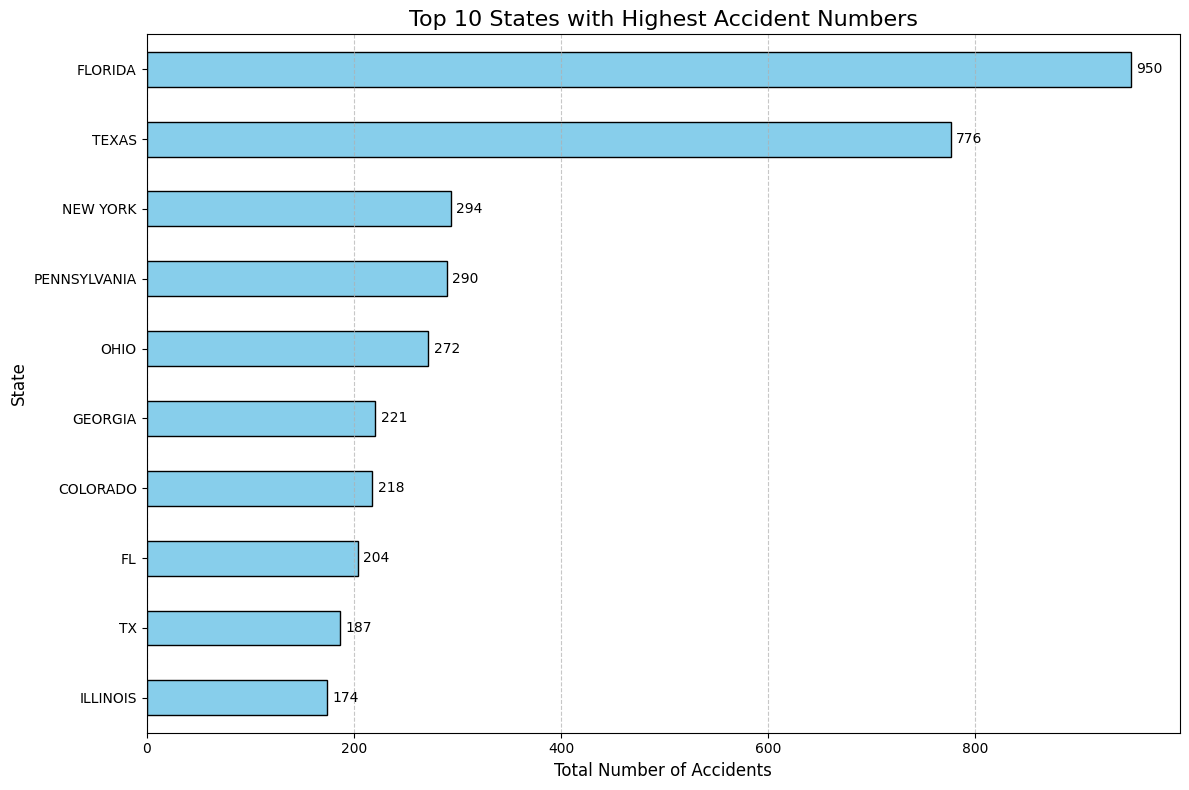

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def state_impact_on_accidents(dfs, top_n=10):
    """
    Find and visualize the states with the highest impact on accident numbers.

    Parameters:
    dfs: Dictionary of dataframes from all sheets
    top_n: Number of top states to display (default=10)
    """
    # Create an empty Series to hold state accident counts
    state_accidents = pd.Series(dtype=int)

    # Combine data from all sheets and count accidents by state
    for sheet_name, data in dfs.items():
        if 'State' in data.columns:
            # Add state counts to the series
            state_accidents = state_accidents.add(data['State'].value_counts(), fill_value=0)

    # Sort states by total accident count in descending order
    state_accidents = state_accidents.sort_values(ascending=False)

    # Plotting the top N states with highest accident numbers
    plt.figure(figsize=(12, 8))
    state_accidents.head(top_n).plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title(f'Top {top_n} States with Highest Accident Numbers', fontsize=16)
    plt.xlabel('Total Number of Accidents', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability

    # Annotate total accident numbers on the bars
    for index, value in enumerate(state_accidents.head(top_n)):
        plt.text(value + 5, index, f"{int(value)}", fontsize=10, va='center')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Run the function
state_impact_on_accidents(dfs, top_n=10)


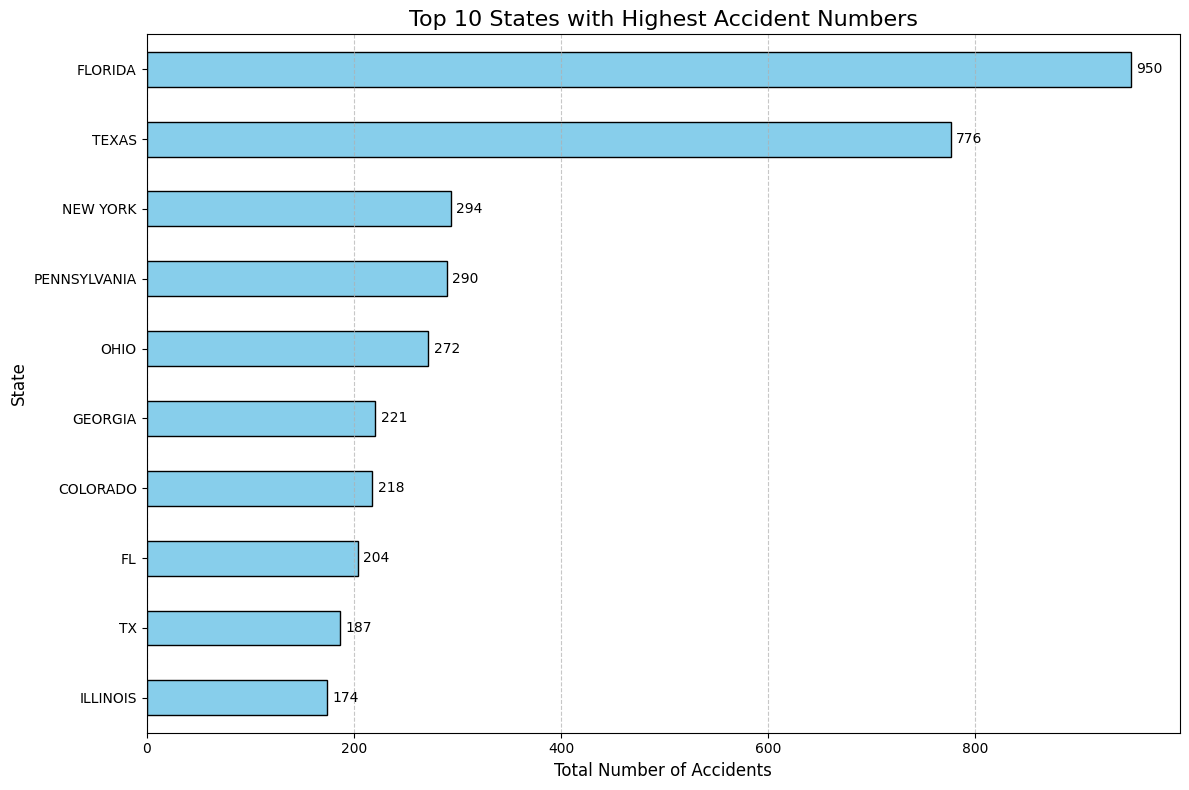

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def state_impact_on_accidents(dfs, top_n=10):
    """
    Find and visualize the states with the highest impact on accident numbers.

    Parameters:
    dfs: Dictionary of dataframes from all sheets
    top_n: Number of top states to display (default=10)
    """
    # Create an empty Series to hold state accident counts
    state_accidents = pd.Series(dtype=int)

    # Combine data from all sheets and count accidents by state
    for sheet_name, data in dfs.items():
        if 'State' in data.columns:
            # Add state counts to the series
            state_accidents = state_accidents.add(data['State'].value_counts(), fill_value=0)

    # Sort states by total accident count in descending order
    state_accidents = state_accidents.sort_values(ascending=False)

    # Plotting the top N states with highest accident numbers
    plt.figure(figsize=(12, 8))
    state_accidents.head(top_n).plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title(f'Top {top_n} States with Highest Accident Numbers', fontsize=16)
    plt.xlabel('Total Number of Accidents', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability

    # Annotate total accident numbers on the bars
    for index, value in enumerate(state_accidents.head(top_n)):
        plt.text(value + 5, index, f"{int(value)}", fontsize=10, va='center')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot as a JPEG with 300 dpi
    file_name = 'Top_States_with_Highest_Accident_Numbers.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Run the function
state_impact_on_accidents(dfs, top_n=10)


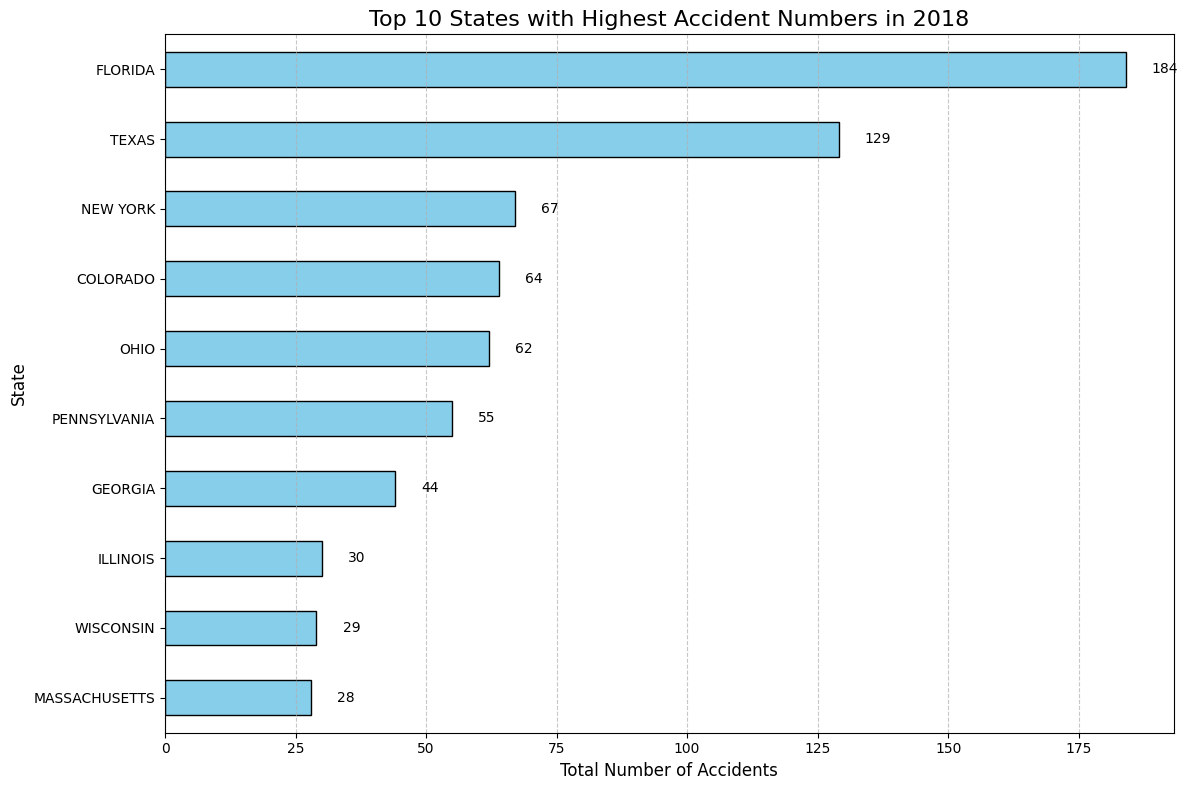

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def state_impact_for_specific_year(dfs, year, top_n=10):
    """
    Find and visualize the states with the highest impact on accident numbers for a specific year.

    Parameters:
    dfs: Dictionary of dataframes from all sheets
    year: The specific year to filter the data (e.g., 2018)
    top_n: Number of top states to display (default=10)
    """
    # Create an empty Series to hold state accident counts
    state_accidents = pd.Series(dtype=int)

    # Combine data from all sheets and count accidents by state for the specified year
    for sheet_name, data in dfs.items():
        if 'State' in data.columns and 'EventDate' in data.columns:
            # Convert 'EventDate' to datetime and filter for the specified year
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year

            # Filter data for the specified year
            year_data = data[data['Year'] == year]

            # Add state counts for the specified year
            state_accidents = state_accidents.add(year_data['State'].value_counts(), fill_value=0)

    # Sort states by total accident count in descending order
    state_accidents = state_accidents.sort_values(ascending=False)

    # Plotting the top N states with highest accident numbers for the specific year
    plt.figure(figsize=(12, 8))
    state_accidents.head(top_n).plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title(f'Top {top_n} States with Highest Accident Numbers in {year}', fontsize=16)
    plt.xlabel('Total Number of Accidents', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability

    # Annotate total accident numbers on the bars
    for index, value in enumerate(state_accidents.head(top_n)):
        plt.text(value + 5, index, f"{int(value)}", fontsize=10, va='center')

    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot as a JPEG with 300 dpi
    file_name = f'Top_States_with_Highest_Accident_Numbers_in_{year}.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Example: Run the function for 2018
state_impact_for_specific_year(dfs, year=2018, top_n=10)


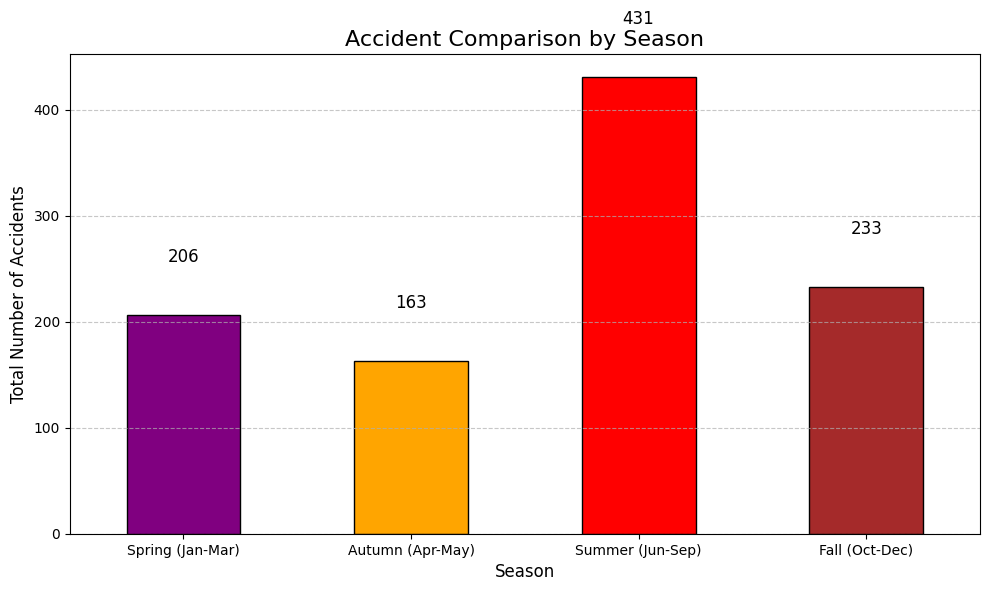

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def accidents_by_season(dfs):
    """
    Compare accident counts across four seasons: Spring, Autumn, Summer, and Fall.
    """
    # Define seasons
    spring_months = ["January", "February", "March"]
    autumn_months = ["April", "May"]
    summer_months = ["June", "July", "August", "September"]
    fall_months = ["October", "November", "December"]

    # Create counters for each season
    spring_accidents = 0
    autumn_accidents = 0
    summer_accidents = 0
    fall_accidents = 0

    # Combine data from all sheets and separate by seasons
    for sheet_name, data in dfs.items():
        if 'Event Month' in data.columns:
            # Count accidents in each season
            spring_accidents += data[data['Event Month'].isin(spring_months)].shape[0]
            autumn_accidents += data[data['Event Month'].isin(autumn_months)].shape[0]
            summer_accidents += data[data['Event Month'].isin(summer_months)].shape[0]
            fall_accidents += data[data['Event Month'].isin(fall_months)].shape[0]

    # Prepare data for visualization
    accident_comparison = pd.Series({
        'Spring (Jan-Mar)': spring_accidents,
        'Autumn (Apr-May)': autumn_accidents,
        'Summer (Jun-Sep)': summer_accidents,
        'Fall (Oct-Dec)': fall_accidents
    })

    # Plotting accidents by season
    plt.figure(figsize=(10, 6))
    accident_comparison.plot(kind='bar', color=['purple', 'orange', 'red', 'brown'], edgecolor='black')
    plt.title('Accident Comparison by Season', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Total Number of Accidents', fontsize=12)
    plt.xticks(rotation=0)

    # Annotate total accident numbers on bars
    for index, value in enumerate(accident_comparison):
        plt.text(index, value + 50, f"{int(value)}", fontsize=12, ha='center')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot as a JPEG with 300 dpi
    file_name = 'Accident_Comparison_by_Season.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Run the function
accidents_by_season(dfs)


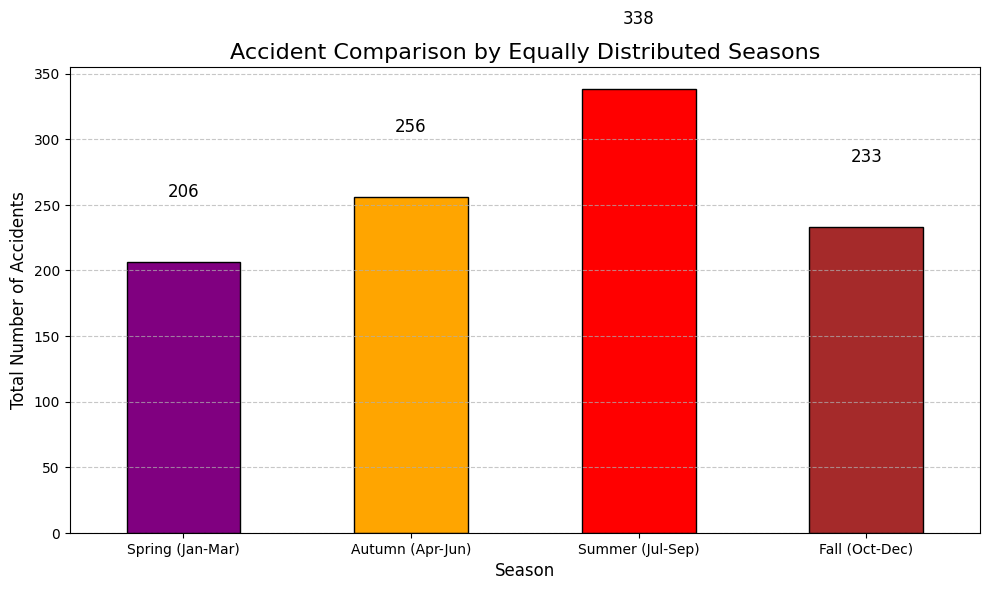

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

def equally_distributed_seasonal_accidents(dfs):
    """
    Compare accident counts across equally distributed seasons.
    """
    # Define seasons with equal distribution
    spring_months = ["January", "February", "March"]
    autumn_months = ["April", "May", "June"]
    summer_months = ["July", "August", "September"]
    fall_months = ["October", "November", "December"]

    # Create counters for each season
    spring_accidents = 0
    autumn_accidents = 0
    summer_accidents = 0
    fall_accidents = 0

    # Combine data from all sheets and separate by seasons
    for sheet_name, data in dfs.items():
        if 'Event Month' in data.columns:
            # Count accidents in each season
            spring_accidents += data[data['Event Month'].isin(spring_months)].shape[0]
            autumn_accidents += data[data['Event Month'].isin(autumn_months)].shape[0]
            summer_accidents += data[data['Event Month'].isin(summer_months)].shape[0]
            fall_accidents += data[data['Event Month'].isin(fall_months)].shape[0]

    # Prepare data for visualization
    accident_comparison = pd.Series({
        'Spring (Jan-Mar)': spring_accidents,
        'Autumn (Apr-Jun)': autumn_accidents,
        'Summer (Jul-Sep)': summer_accidents,
        'Fall (Oct-Dec)': fall_accidents
    })

    # Plotting accidents by season
    plt.figure(figsize=(10, 6))
    accident_comparison.plot(kind='bar', color=['purple', 'orange', 'red', 'brown'], edgecolor='black')
    plt.title('Accident Comparison by Equally Distributed Seasons', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Total Number of Accidents', fontsize=12)
    plt.xticks(rotation=0)

    # Annotate total accident numbers on bars
    for index, value in enumerate(accident_comparison):
        plt.text(index, value + 50, f"{int(value)}", fontsize=12, ha='center')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Run the function
equally_distributed_seasonal_accidents(dfs)


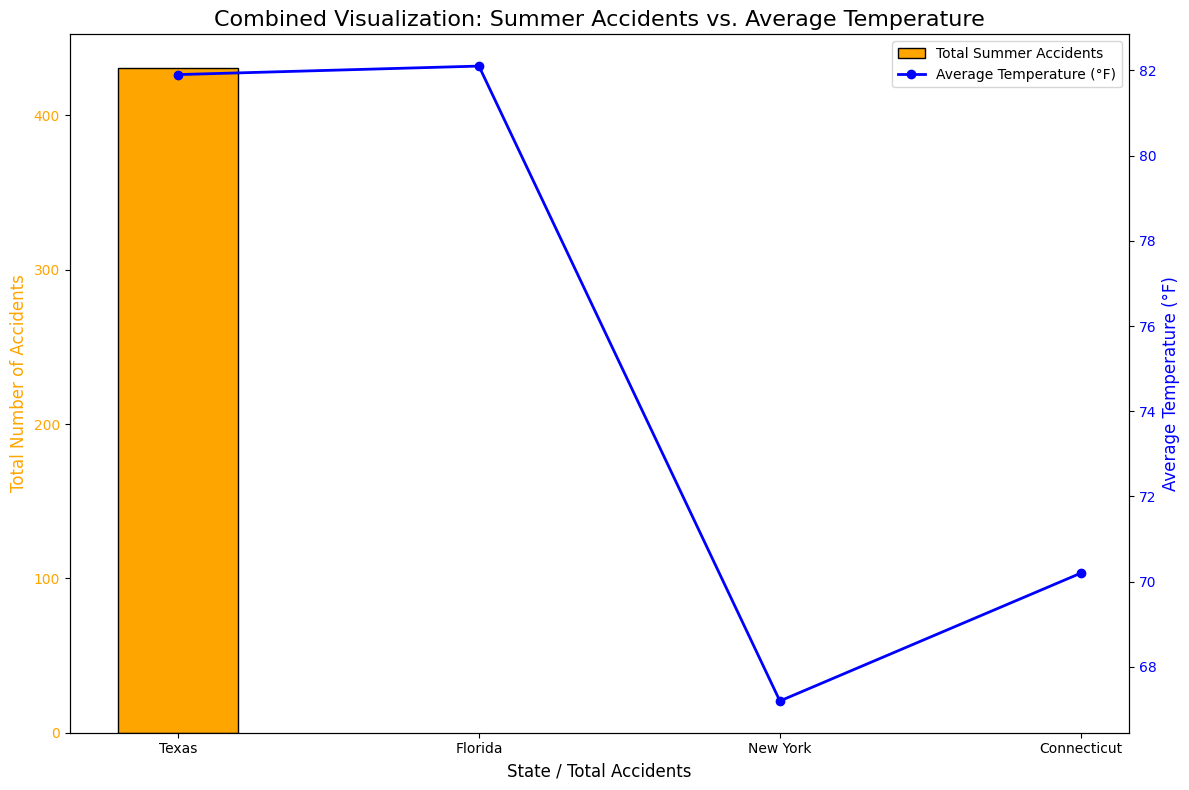

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

def combined_accident_temperature_visualization(dfs, temp_data):
    """
    Create a combined visualization of accidents and average temperatures.

    Parameters:
    dfs: Dictionary of dataframes from all sheets (accident data)
    temp_data: Dictionary with average temperatures for specified states
    """
    # Define summer months
    summer_months = ["June", "July", "August", "September"]

    # Create a counter for summer accidents
    summer_accidents = 0

    # Aggregate accident counts for summer months across all sheets
    for sheet_name, data in dfs.items():
        if 'Event Month' in data.columns:
            summer_accidents += data[data['Event Month'].isin(summer_months)].shape[0]

    # Prepare accident data for visualization
    accident_data = pd.Series({
        'Total Summer Accidents': summer_accidents
    })

    # Extract average temperature data from the temp_data dictionary
    avg_temp = {state: temp_data[state]['Avg Temp'] for state in temp_data.keys()}
    avg_temp_series = pd.Series(avg_temp)

    # Plotting the combined visualization
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot accident data
    ax1.bar(accident_data.index, accident_data.values, color='orange', edgecolor='black', width=0.4, label='Total Summer Accidents')
    ax1.set_ylabel('Total Number of Accidents', fontsize=12, color='orange')
    ax1.tick_params(axis='y', labelcolor='orange')

    # Create a second y-axis for average temperatures
    ax2 = ax1.twinx()
    ax2.plot(avg_temp_series.index, avg_temp_series.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Average Temperature (°F)')
    ax2.set_ylabel('Average Temperature (°F)', fontsize=12, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Add titles and legend
    plt.title('Combined Visualization: Summer Accidents vs. Average Temperature', fontsize=16)
    ax1.set_xlabel('State / Total Accidents', fontsize=12)
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()

# Example temperature data for selected states (to be replaced with actual data)
temp_data_example = {
    'Texas': {'Avg Temp': 81.9},
    'Florida': {'Avg Temp': 82.1},
    'New York': {'Avg Temp': 67.2},
    'Connecticut': {'Avg Temp': 70.2}
}

# Run the function with example data
combined_accident_temperature_visualization(dfs, temp_data_example)


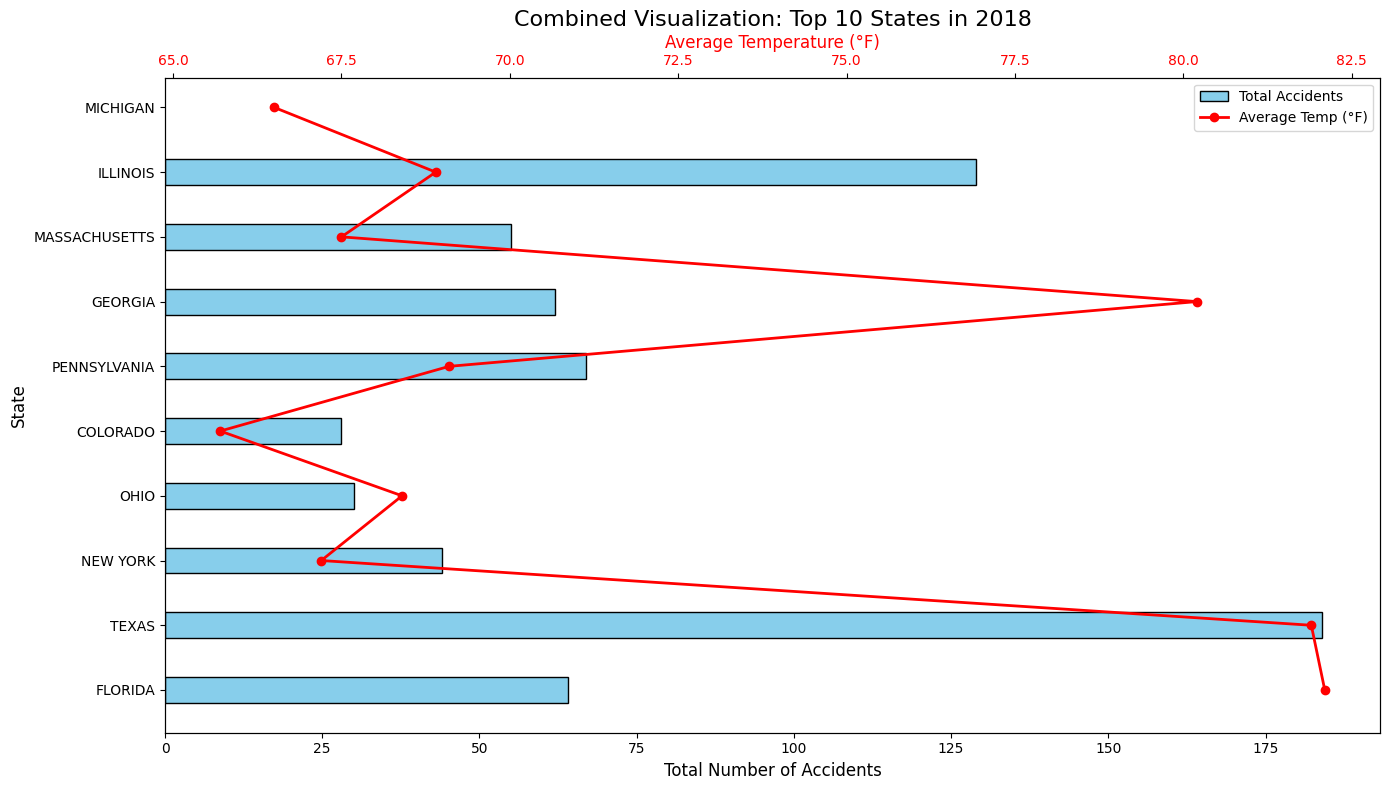

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def top_10_combined_visualization(dfs, top_states, temp_data):
    """
    Create a combined visualization of accidents and average temperatures for the top 10 states.

    Parameters:
    dfs: Dictionary of dataframes from all sheets (accident data)
    top_states: List of top 10 states with highest accident counts
    temp_data: Dictionary with average temperatures for top states
    """
    # Initialize a dictionary to store accident counts for top states
    state_accidents = pd.Series(dtype=int)

    # Aggregate accident counts for the top states in 2018
    for sheet_name, data in dfs.items():
        if 'State' in data.columns and 'EventDate' in data.columns:
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year

            # Filter data for 2018 and top states
            year_data = data[(data['Year'] == 2018) & (data['State'].isin(top_states))]
            state_accidents = state_accidents.add(year_data['State'].value_counts(), fill_value=0)

    # Extract average temperature data for the top states
    avg_temp_series = pd.Series({state: temp_data[state]['Avg Temp'] for state in top_states})

    # Plotting the combined visualization
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot accident data as a bar chart
    ax1.barh(state_accidents.index, state_accidents.values, color='skyblue', edgecolor='black', height=0.4, label='Total Accidents')
    ax1.set_xlabel('Total Number of Accidents', fontsize=12)
    ax1.set_ylabel('State', fontsize=12)
    ax1.set_title('Combined Visualization: Top 10 States in 2018', fontsize=16)

    # Create a second x-axis for average temperatures
    ax2 = ax1.twiny()
    ax2.plot(avg_temp_series.values, avg_temp_series.index, color='red', marker='o', linestyle='-', linewidth=2, label='Average Temp (°F)')
    ax2.set_xlabel('Average Temperature (°F)', fontsize=12, color='red')
    ax2.tick_params(axis='x', labelcolor='red')

    # Add legends
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()

# Example data for top states and their average temperatures (replace with actual data)
top_states = ['FLORIDA', 'TEXAS', 'NEW YORK', 'OHIO', 'COLORADO', 'PENNSYLVANIA',
              'GEORGIA', 'MASSACHUSETTS', 'ILLINOIS', 'MICHIGAN']

temp_data_example = {
    'FLORIDA': {'Avg Temp': 82.1},
    'TEXAS': {'Avg Temp': 81.9},
    'NEW YORK': {'Avg Temp': 67.2},
    'OHIO': {'Avg Temp': 68.4},
    'COLORADO': {'Avg Temp': 65.7},
    'PENNSYLVANIA': {'Avg Temp': 69.1},
    'GEORGIA': {'Avg Temp': 80.2},
    'MASSACHUSETTS': {'Avg Temp': 67.5},
    'ILLINOIS': {'Avg Temp': 68.9},
    'MICHIGAN': {'Avg Temp': 66.5}
}

# Run the function with example data
top_10_combined_visualization(dfs, top_states, temp_data_example)


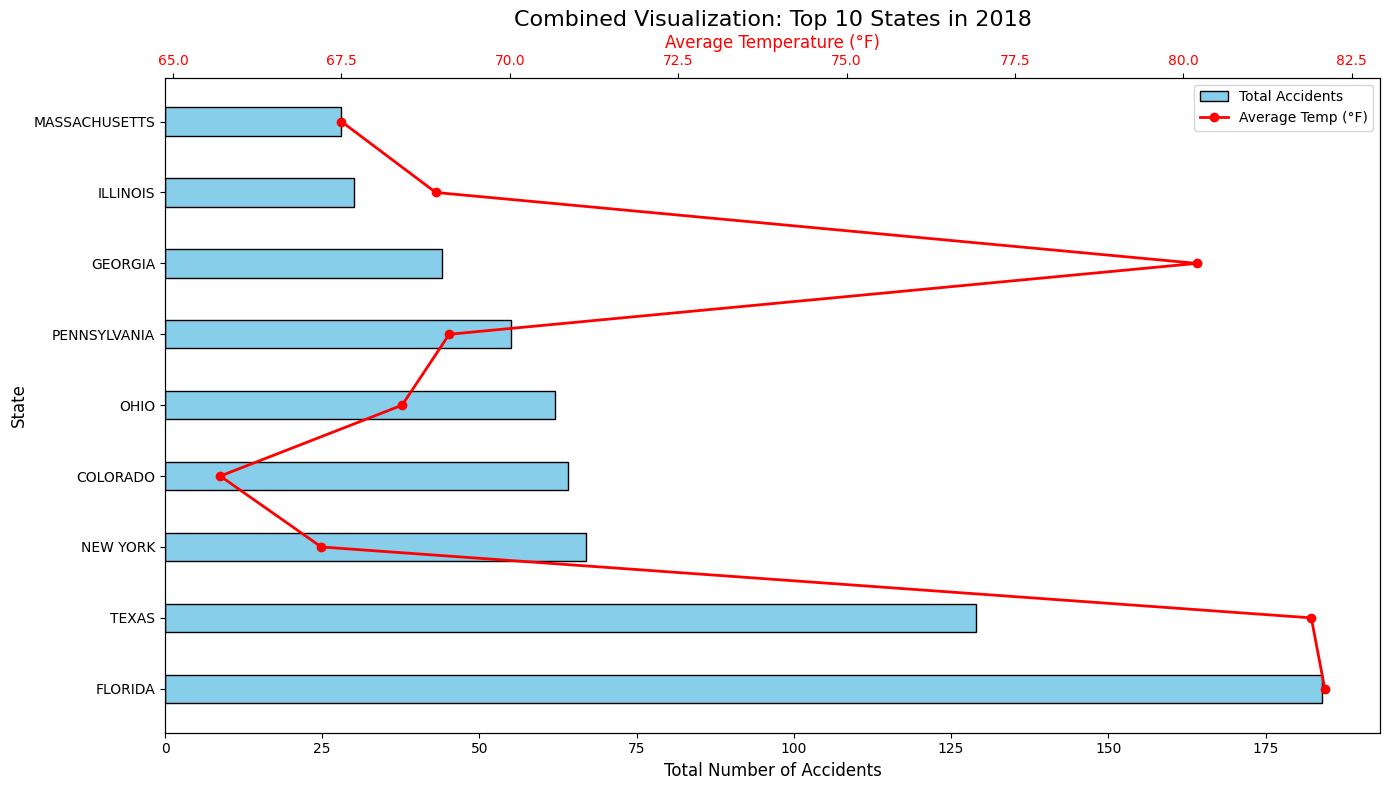

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def adjusted_combined_visualization_2018(dfs, top_states, temp_data):
    """
    Create a combined visualization of accidents and average temperatures for the top 10 states in 2018.

    Parameters:
    dfs: Dictionary of dataframes from all sheets (accident data)
    top_states: List of top 10 states with highest accident counts
    temp_data: Dictionary with average temperatures for top states
    """
    # Initialize a dictionary to store accident counts for the top states in 2018
    state_accidents = pd.Series(dtype=int)

    # Aggregate accident counts for the top states in 2018
    for sheet_name, data in dfs.items():
        if 'State' in data.columns and 'EventDate' in data.columns:
            data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
            data['Year'] = data['EventDate'].dt.year

            # Filter data for 2018 and top states
            year_data = data[(data['Year'] == 2018) & (data['State'].isin(top_states))]
            state_accidents = state_accidents.add(year_data['State'].value_counts(), fill_value=0)

    # Sort state accidents to ensure correct visualization order
    state_accidents = state_accidents.sort_values(ascending=False)

    # Extract average temperature data for the top states in the same order
    avg_temp_series = pd.Series({state: temp_data[state]['Avg Temp'] for state in state_accidents.index})

    # Plotting the combined visualization
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot accident data as a bar chart
    ax1.barh(state_accidents.index, state_accidents.values, color='skyblue', edgecolor='black', height=0.4, label='Total Accidents')
    ax1.set_xlabel('Total Number of Accidents', fontsize=12)
    ax1.set_ylabel('State', fontsize=12)
    ax1.set_title('Combined Visualization: Top 10 States in 2018', fontsize=16)

    # Create a second x-axis for average temperatures
    ax2 = ax1.twiny()
    ax2.plot(avg_temp_series.values, avg_temp_series.index, color='red', marker='o', linestyle='-', linewidth=2, label='Average Temp (°F)')
    ax2.set_xlabel('Average Temperature (°F)', fontsize=12, color='red')
    ax2.tick_params(axis='x', labelcolor='red')

    # Add legends
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    plt.tight_layout()

    # Save the plot as a JPEG with 300 dpi
    file_name = 'Combined_Visualization_Top_States_2018.jpeg'
    plt.savefig(file_name, dpi=300, format='jpeg')

    # Display the plot
    plt.show()

    # Provide download link
    files.download(file_name)

# Define the top states based on 2018 accident data
top_states = ['FLORIDA', 'TEXAS', 'NEW YORK', 'OHIO', 'COLORADO', 'PENNSYLVANIA',
              'GEORGIA', 'MASSACHUSETTS', 'ILLINOIS', 'MICHIGAN']

# Example data for average temperatures (replace with actual data for 2018)
temp_data_example = {
    'FLORIDA': {'Avg Temp': 82.1},
    'TEXAS': {'Avg Temp': 81.9},
    'NEW YORK': {'Avg Temp': 67.2},
    'OHIO': {'Avg Temp': 68.4},
    'COLORADO': {'Avg Temp': 65.7},
    'PENNSYLVANIA': {'Avg Temp': 69.1},
    'GEORGIA': {'Avg Temp': 80.2},
    'MASSACHUSETTS': {'Avg Temp': 67.5},
    'ILLINOIS': {'Avg Temp': 68.9},
    'MICHIGAN': {'Avg Temp': 66.5}
}

# Run the function with example data
adjusted_combined_visualization_2018(dfs, top_states, temp_data_example)


In [19]:
import pandas as pd
from google.colab import files

# Upload files
uploaded_files = files.upload()

# Load the datasets
indoor_df = pd.read_excel(uploaded_files['Indoor.xlsx'])
outdoor_df = pd.read_excel(uploaded_files['outdoor.xlsx'])

# Display first few rows to verify the data is loaded correctly
print("Indoor Data:")
display(indoor_df.head())
print("\nOutdoor Data:")
display(outdoor_df.head())


Saving PlaywithData (2).xlsx to PlaywithData (2).xlsx
Saving Indoor.xlsx to Indoor.xlsx


<ipython-input-19-a0472729a505>:8: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  indoor_df = pd.read_excel(uploaded_files['Indoor.xlsx'])


KeyError: 'outdoor.xlsx'

In [20]:
# Display the column names of both datasets
print("Indoor DataFrame Columns:", indoor_df.columns)
print("Outdoor DataFrame Columns:", outdoor_df.columns)


Indoor DataFrame Columns: Index(['ID', 'UPA', 'EventDate', 'EventMonth', 'Employer', 'Address1',
       'Address2', 'City', 'State', 'Zip', 'Latitude', 'Longitude',
       'Primary NAICS', 'Hospitalized', 'Amputation', 'Inspection',
       'Final Narrative', 'Nature', 'NatureTitle', 'Part of Body',
       'Part of Body Title', 'Event', 'EventTitle', 'Source', 'SourceTitle',
       'Secondary Source', 'Secondary Source Title'],
      dtype='object')


NameError: name 'outdoor_df' is not defined

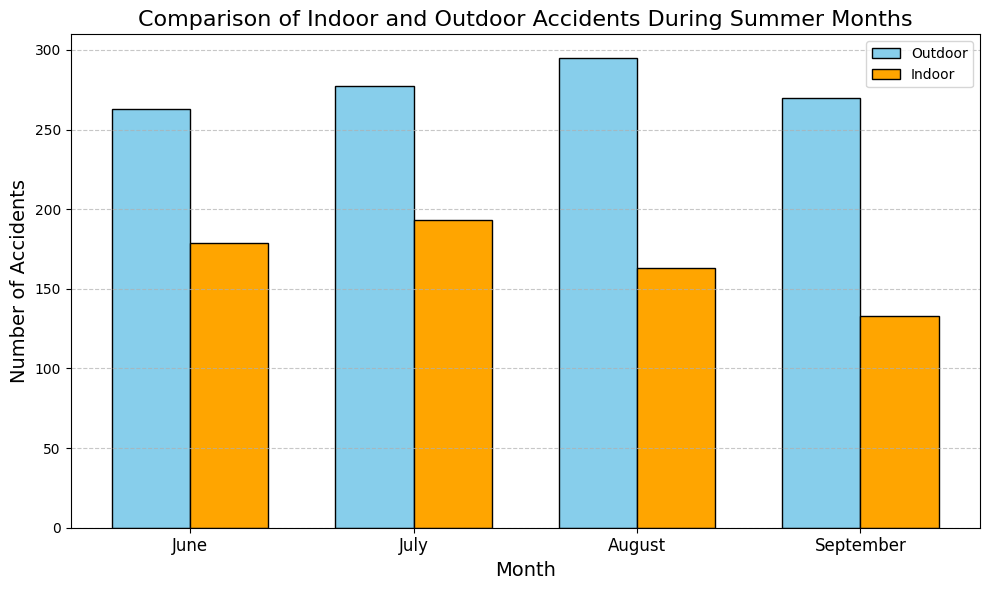

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Data based on the provided image
months = ["June", "July", "August", "September"]
outdoor_accidents = [263, 277, 295, 270]  # Accident numbers for outdoor
indoor_accidents = [179, 193, 163, 133]   # Accident numbers for indoor

# Create a DataFrame
data = pd.DataFrame({
    'Month': months,
    'Outdoor': outdoor_accidents,
    'Indoor': indoor_accidents
})

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(months))

# Bar plot for outdoor and indoor accidents
plt.bar(index, data['Outdoor'], width=bar_width, label='Outdoor', color='skyblue', edgecolor='black')
plt.bar([i + bar_width for i in index], data['Indoor'], width=bar_width, label='Indoor', color='orange', edgecolor='black')

# Adding titles and labels
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.title('Comparison of Indoor and Outdoor Accidents During Summer Months', fontsize=16)
plt.xticks([i + bar_width/2 for i in index], months, fontsize=12)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save the plot as a JPEG with 300 dpi
file_name = 'Comparison_of_Indoor_and_Outdoor_Accidents.jpeg'
plt.savefig(file_name, dpi=300, format='jpeg')

# Show the plot
plt.show()

# Provide download link
files.download(file_name)


In [22]:
import numpy as np
import scipy.stats as stats

# Data for summer months (June, July, August, September)
outdoor_accidents = [263, 277, 295, 270]
indoor_accidents = [179, 193, 163, 133]

# 1. F-test for Two-Sample Variance
var_outdoor = np.var(outdoor_accidents, ddof=1)
var_indoor = np.var(indoor_accidents, ddof=1)

f_stat = var_outdoor / var_indoor
df_outdoor = len(outdoor_accidents) - 1
df_indoor = len(indoor_accidents) - 1
p_value_f = stats.f.cdf(f_stat, df_outdoor, df_indoor)

# Output F-test results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value (F-test): {p_value_f:.4f}")

# Remark for F-test
if p_value_f > 0.05:
    print("Remark (F-test): The variances are not significantly different. Proceeding with the t-test assuming equal variances.")
else:
    print("Remark (F-test): The variances are significantly different. Consider using a t-test assuming unequal variances.")

# 2. Two-Sample t-test Assuming Equal Variance (Two-Tail)
t_stat, p_value_two_tail = stats.ttest_ind(outdoor_accidents, indoor_accidents, equal_var=True)

# Output two-tail t-test results
print(f"\nTwo-Tail T-statistic: {t_stat:.2f}")
print(f"P-value (Two-Tail T-test): {p_value_two_tail:.4f}")

# Remark for Two-Tail T-test
if p_value_two_tail < 0.05:
    print("Remark (Two-Tail T-test): There is a statistically significant difference between indoor and outdoor accident rates during summer months (two-tailed).")
else:
    print("Remark (Two-Tail T-test): There is no statistically significant difference between indoor and outdoor accident rates during summer months (two-tailed).")

# 3. One-Tail T-test (assuming outdoor > indoor)
# Divide the two-tail p-value by 2 for one-tail test
p_value_one_tail = p_value_two_tail / 2

# Output one-tail t-test results
print(f"\nOne-Tail T-statistic: {t_stat:.2f}")
print(f"P-value (One-Tail T-test): {p_value_one_tail:.4f}")

# Remark for One-Tail T-test
if (t_stat > 0) and (p_value_one_tail < 0.05):
    print("Remark (One-Tail T-test): There is a statistically significant difference, with outdoor accident rates being higher than indoor rates (one-tailed).")
else:
    print("Remark (One-Tail T-test): There is no statistically significant difference for the hypothesis that outdoor accident rates are higher (one-tailed).")


F-statistic: 0.28
P-value (F-test): 0.1647
Remark (F-test): The variances are not significantly different. Proceeding with the t-test assuming equal variances.

Two-Tail T-statistic: 7.48
P-value (Two-Tail T-test): 0.0003
Remark (Two-Tail T-test): There is a statistically significant difference between indoor and outdoor accident rates during summer months (two-tailed).

One-Tail T-statistic: 7.48
P-value (One-Tail T-test): 0.0001
Remark (One-Tail T-test): There is a statistically significant difference, with outdoor accident rates being higher than indoor rates (one-tailed).


In [29]:
import graphviz

# Create a new directed graph
dot = graphviz.Digraph(format='png')

# Define the styles for different shapes and colors
style1 = {'shape': 'ellipse', 'style': 'filled', 'color': '#cfe2f3'}
style2 = {'shape': 'box', 'style': 'filled', 'color': '#f4cccc'}
style3 = {'shape': 'diamond', 'style': 'filled', 'color': '#d9d2e9'}
style4 = {'shape': 'ellipse', 'style': 'filled', 'color': '#d9ead3'}

# Add nodes with specified shapes and styles
dot.node('A', 'Data Collection\n(OSHA)', **style1)
dot.node('B', '(NAICS)\n(2015-2021)', **style2)
dot.node('C', 'Data Preparation\n(Cleaning & Filtering)', **style3)
dot.node('D', 'Analytical Steps', **style3)
dot.node('E', 'Statistical Analysis', **style2)
dot.node('F', 'Variance Analysis', **style4)
dot.node('G', 'Correlation Analysis', **style4)
dot.node('H', 'Visualization', **style2)

# Add edges to represent the flow
dot.edge('A', 'B')
dot.edge('B', 'C', style='dotted')
dot.edge('C', 'D', style='dotted')
dot.edge('D', 'E', style='dotted')
dot.edge('D', 'H', style='dotted')
dot.edge('E', 'F')
dot.edge('F', 'G')

# Save and render the graph
dot.render('Flowchart_Analysis_Process', view=True)


'Flowchart_Analysis_Process.png'

In [30]:
from google.colab import files
files.download('Flowchart_Analysis_Process.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>